# Setup Data

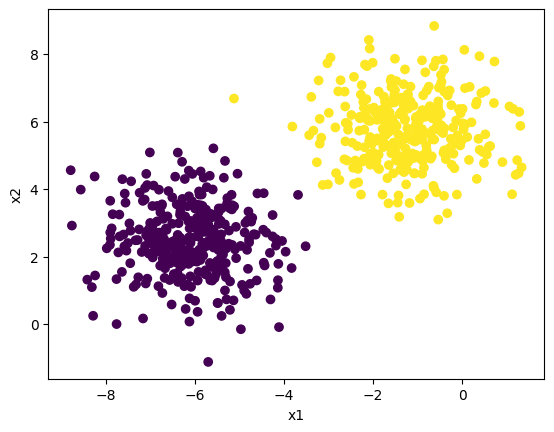

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create data point clusters
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1234)

# Split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert data to PyTorch tensors
X_tensor_train = torch.tensor(X_train, dtype=torch.float32)
y_tensor_train = torch.tensor(y_train, dtype=torch.long)

X_tensor_test = torch.tensor(X_test, dtype=torch.float32)
y_tensor_test = torch.tensor(y_test, dtype=torch.long)

# Create a dataset and dataloader
dataset_train = TensorDataset(X_tensor_train, y_tensor_train)
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)

dataset_test = TensorDataset(X_tensor_test, y_tensor_test)
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=True)

# Create Neural Network

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Get the current device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create neural network
class ClusterBuster(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ClusterBuster, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu(out)
        out = self.layer_2(out)
        return out

# Initialize the network, loss function (criterion), and optimizer
model = ClusterBuster(input_size=2, hidden_size=3, output_size=2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)
for param in model.parameters():
  print(param)

ClusterBuster(
  (layer_1): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=3, out_features=2, bias=True)
)
Parameter containing:
tensor([[ 0.6540, -0.6841],
        [-0.5078, -0.2521],
        [-0.4015,  0.4785]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.0084,  0.1009, -0.2901], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.2332,  0.5740,  0.4811],
        [ 0.5158,  0.1054, -0.2742]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.2405,  0.4316], device='cuda:0', requires_grad=True)


# Traning and Evaluation

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
  # Train Loop
  model.train()
  for inputs, labels in dataloader_train:
    inputs, labels = inputs.to(device), labels.to(device)

    # Forward pass
    class_predictions = model(inputs)                   # make predictions
    loss_train = criterion(class_predictions, labels)   # compare predictions to labels using loss fuction

    # Backward pass and optimization
    optimizer.zero_grad()
    loss_train.backward()     # compute gradients using the loss function
    optimizer.step()          # updates model's parameters using the gradients

  # Test Loop - Evaluate on data it hasn't seen before
  model.eval()
  with torch.no_grad():
    for inputs, labels in dataloader_test:
      inputs, labels = inputs.to(device), labels.to(device)

      class_predictions = model(inputs)
      loss_test = criterion(class_predictions, labels)

  print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}')


Epoch [1/5], Train Loss: 0.9188, Test Loss: 0.8501
Epoch [2/5], Train Loss: 0.7631, Test Loss: 0.7873
Epoch [3/5], Train Loss: 0.4273, Test Loss: 0.7864
Epoch [4/5], Train Loss: 0.5143, Test Loss: 0.5846
Epoch [5/5], Train Loss: 0.6190, Test Loss: 0.4422


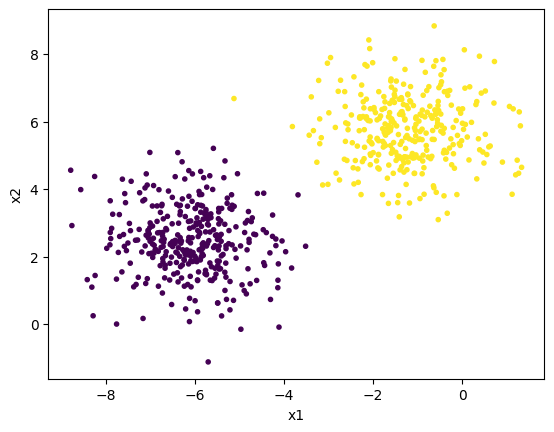

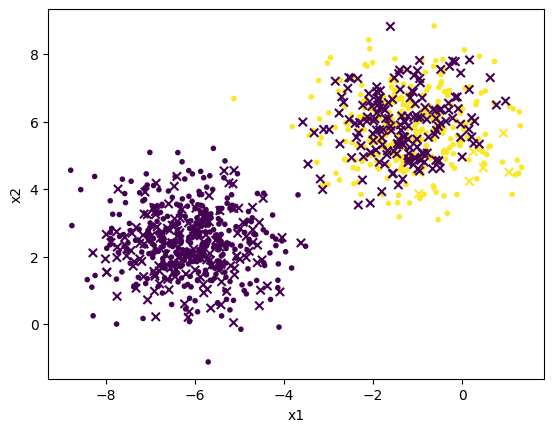

In [ ]:
# Get predictions
with torch.no_grad():
  class_predictions = model(X_tensor_test.to(device))
  _, predicted = torch.max(class_predictions, 1)
  predicted = predicted.to('cpu')

# Visualize train data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Visualize test data too
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted.numpy(), marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()